In [6]:
# 수기 문자 샘플 추출
import re
from subprocess import Popen, PIPE

#------------#
# Parameters #
#------------#
Num = 600           # 추출하는 글자 수
Chars = '[036]'     # 추출하는 숫자(임의의 개수 숫자를 지정 가능)

labels = open('train-labels.txt', 'r')
images = open('train-images.txt', 'r')
labels_out = open('sample-labels.txt', 'w')
images_out = open('sample-images.txt', 'w')
chars = re.compile(Chars)

while True:
    label = labels.readline()
    image = images.readline()
#     print(len(image))
    if (not image) or (not label):
        break
    if not chars.search(label):
        continue
        
    line = ''
    for c in image.split(" "):
        if int(c) > 127:
            line += '1,'
        else:
            line += '0,'
    line = line[:-1]

    labels_out.write(label)
    images_out.write(line + '\n')
    Num -= 1
    if Num == 0:
        break

labels.close()
images.close()
labels_out.close()
images_out.close()

images = open('sample-images.txt', 'r')
samples = open('samples.txt', 'w')
c = 0

while True:
    line = images.readline()
    print(len(line))
    if not line:
        break
    x = 0
    sample_data = ""
    for s in line.split(','):
        if int(s) == 1:
            samples.write('#')
            sample_data += '#'
        else:
            samples.write(' ')
            sample_data += ' '

        x += 1
        if x % 28 == 0:
            samples.write('\n')
            sample_data += '\n'
    print(sample_data)
    c += 1
    if c == 10:
        break

images.close()
samples.close()

1568
                            
                            
                            
                            
                ###         
               #####        
              ######        
             ##### ##       
           ####### ###      
           #### ##  ##      
          ####      ##      
         ####       ###     
        ###         ###     
        ##          ###     
       ###          ###     
       ##           ###     
       ##          ###      
       ##         ###       
       ##        ###        
       ##       ###         
       ###   #####          
       ##########           
       ########             
        #####               
                            
                            
                            
                            

1568
                            
                            
                            
                            
                            
              #######       
   

<ipython-input-3-c1729aa3e4e9>:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


iter_num 0
iter_num 1
iter_num 2


<ipython-input-3-c1729aa3e4e9>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


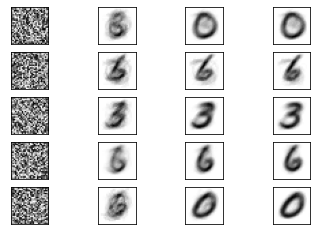

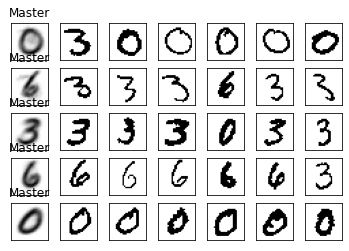

In [3]:
# 혼합 베르누이 분포에 의한 수기 문자 분류

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randint, rand

#------------#
# Parameters #
#------------#
K = 5 # 분류하는 글자 수
N = 3 # 반복 횟수

# 분류 결과 표시
def show_figure(mu, cls):
    fig = plt.figure()
    for c in range(K):
        subplot = fig.add_subplot(K,7,c*7+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('Master')
        subplot.imshow(mu[c].reshape(28,28), cmap=plt.cm.gray_r)
        i = 1
        for j in range(len(cls)):
            if cls[j] == c:
                subplot = fig.add_subplot(K,7,c*7+i+1)
                subplot.set_xticks([])
                subplot.set_yticks([])
                subplot.imshow(df.iloc[j].values.reshape(28,28), cmap=plt.cm.gray_r)
                i += 1
                if i > 6:
                    break
    fig.show()

# 베르누이 분포
def bern(x, mu):
    r = 1.0
    for x_i, mu_i in zip(x, mu):
        if x_i == 1:
            r *= mu_i 
        else:
            r *= (1.0 - mu_i)
    return r

# 트레이닝 세트 읽기
df = pd.read_csv('sample-images.txt', sep=",", header=None)
data_num = len(df)

#초기 매개 변수의 설정
mix = [1.0/K] * K
mu = (rand(28*28*K)*0.5+0.25).reshape(K, 28*28)

for k in range(K):
    mu[k] /= mu[k].sum()

fig = plt.figure()
for k in range(K):
    subplot = fig.add_subplot(K, N+1, k*(N+1)+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
fig.show()

#N회의 Iteration을 실시
for iter_num in range(N):
    print("iter_num %d" % iter_num)

    # E phase
    resp = DataFrame()
    for index, line in df.iterrows():
        tmp = []
        for k in range(K):
            a = mix[k] * bern(line, mu[k])
            if a == 0:
                tmp.append(0.0)
            else:
                s = 0.0
                for kk in range(K):
                    s += mix[kk] * bern(line, mu[kk])
                tmp.append(a/s)
        resp = resp.append([tmp], ignore_index=True)

    # M phase
    for k in range(K):
        nk = resp[k].sum()
        mix[k] = nk/data_num
        for index, line in df.iterrows():
            mu[k] += line * resp[k][index]
        mu[k] /= nk

        subplot = fig.add_subplot(K, N+1, k*(N+1)+(iter_num+1)+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(mu[k].reshape(28,28), cmap=plt.cm.gray_r)
#         fig.show()

# 트레이닝 세트의 문자를 분류
cls = []
for index, line in resp.iterrows():
    cls.append(np.argmax(line[0:]))

# 분류 결과 표시
show_figure(mu, cls)

In [ ]:
# 수기 문자 샘플 추출
import re
from subprocess import Popen, PIPE

#------------#
# Parameters #
#------------#
Num = 600           # 추출하는 글자 수
Chars = '[036]'     # 추출하는 숫자(임의의 개수 숫자를 지정 가능)

labels = open('train-labels.txt', 'r')
images = open('train-images.txt', 'r')
labels_out = open('sample-labels.txt', 'w')
images_out = open('sample-images.txt', 'w')
chars = re.compile(Chars)

In [ ]:
labels.readline()

In [43]:
import numpy as np
image = images.readline()
data = []
line = ''
for c in image.split(" "):
    if int(c) > 127:
        data.append(0)
        line += '1,'
    else:
        data.append(8)
        line += '0,'
line = line[:-1]
# print(line)

print(np.array(data).reshape(28,28))

[[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 0 0 0 0 0 0 8 8 8 8 0 0 0 0 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 0 0 0 0 0 8 8 8 8 8 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 0 0 0 0 8 8 8 8 8 8 0 0 0 0 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 0 0 0 0 8 8 8 8 8 8 8 0 0 0 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 0 0 8 8 8 8 8 8 8 0 0 0 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 8 8 8 8 8 8 8 8 8 8]
 [8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 0 0 8 8 8 8 8 8 8 8 8 8 